In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Personal\Desktop\programación\csv que voy usando/fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [66]:
df2 = df.set_index('date')
df2

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [68]:
df2 = df2[(df2['value'] >= df2['value'].quantile(0.025)) & (df2['value'] <= df2['value'].quantile(0.975))]
df2

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

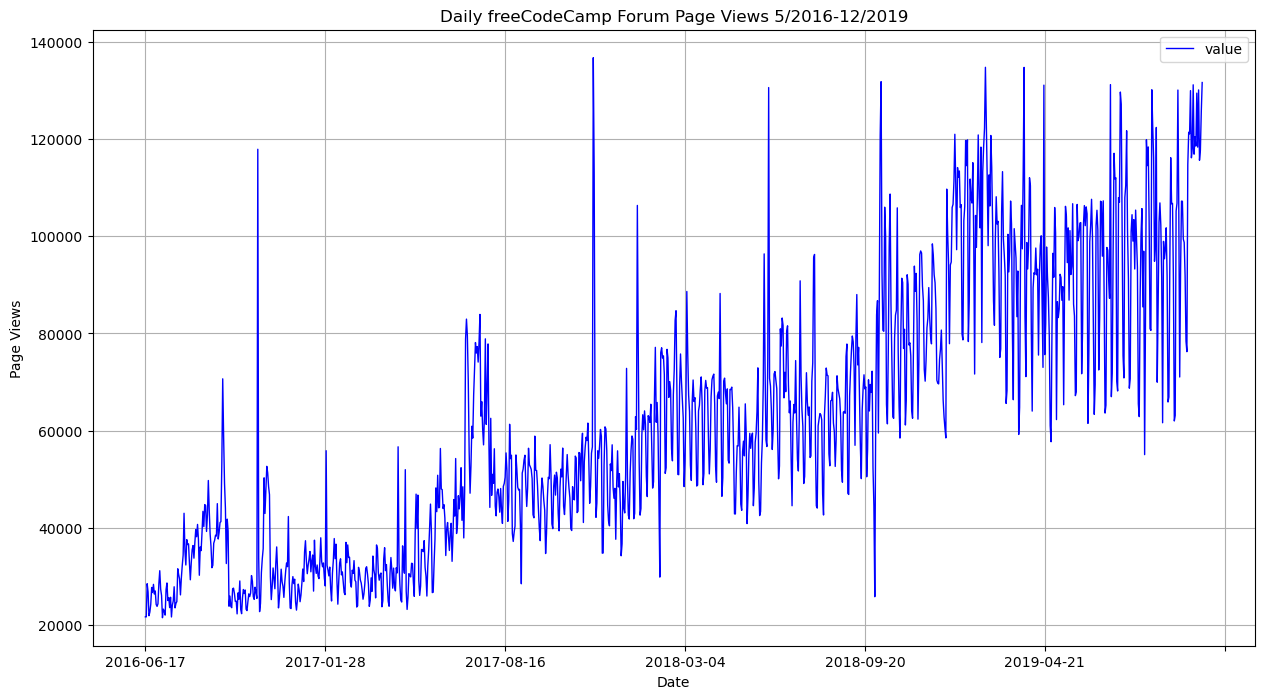

In [52]:
import matplotlib.pyplot as plt
df2.plot(kind='line', title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel = 'Date', ylabel = 'Page Views',
        figsize =(15,8), color='blue',grid=True, linewidth=1, legend = True, label ='page views')


(array([16983., 17167., 17348., 17532., 17713., 17897., 18078., 18262.]),
 [Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01')])

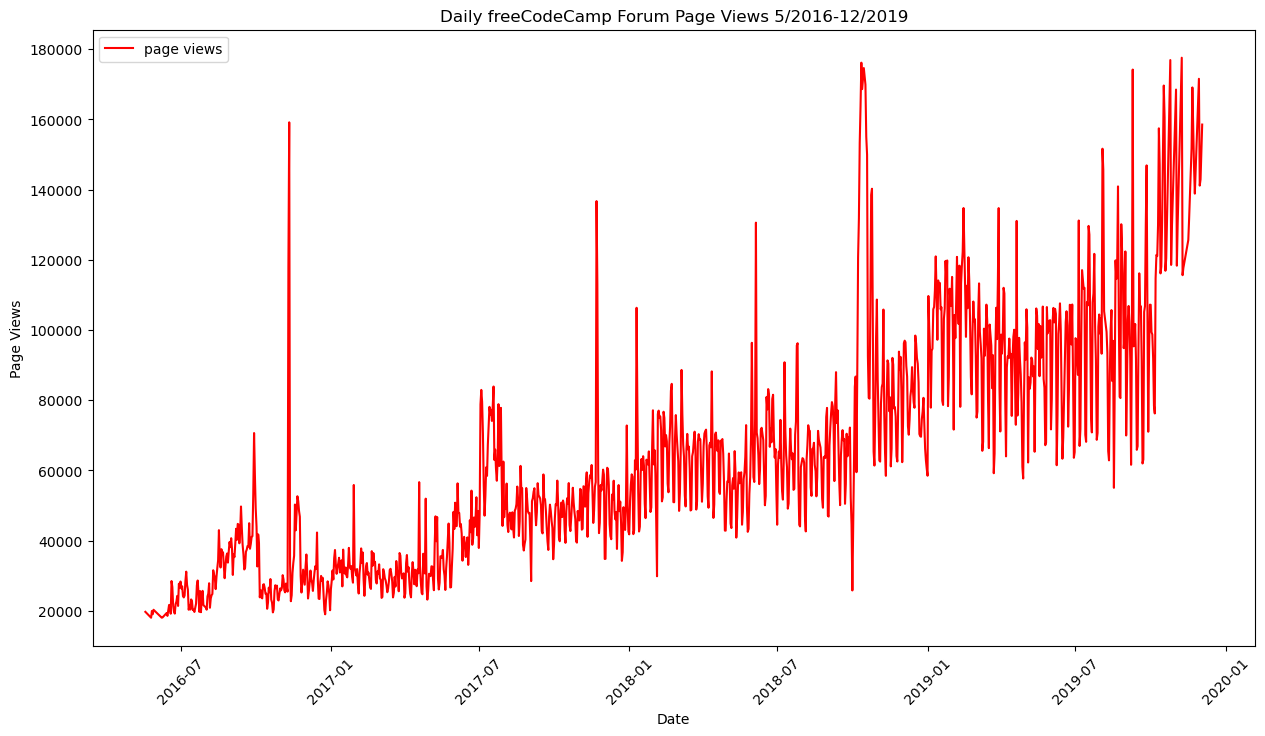

In [101]:
fig, ax = plt.subplots (figsize=(15,8))
ax.plot(df2.index, df2['value'],color = 'red', label = 'page views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
plt.legend(loc='best') 
plt.xticks(rotation=45)

In [75]:
df3 = df2
df3.index = pd.to_datetime(df3.index, errors='coerce')
#df3['year'] = df3.index.year
#df3['month'] = df3.index.month_name
print(df3.index)

DatetimeIndex(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-14', '2016-06-15',
               ...
               '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21',
               '2019-11-23', '2019-11-24', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1238, freq=None)


In [77]:
print(df3.index.isna().sum())

0


In [79]:
df3['Mes'] = df3.index.month
df3

C:\Users\Personal\AppData\Local\Temp\ipykernel_5300\933500331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Mes'] = df3.index.month


,value,Mes
date,,
2016-05-19,19736,5
2016-05-26,18060,5
2016-05-27,19997,5
2016-05-28,19044,5
2016-05-29,20325,5
...,...,...
2019-11-24,138875,11
2019-11-29,171584,11
2019-11-30,141161,11


In [81]:
df3['Año'] = df3.index.year
df3

C:\Users\Personal\AppData\Local\Temp\ipykernel_5300\3868613471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Año'] = df3.index.year


,value,Mes,Año
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [95]:
df3.columns = df3.columns.str.strip()
avg_views = df3.groupby(['Año','Mes']).agg({'value':'mean'}).reset_index()
avg_views

,Año,Mes,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [99]:
avg_views_pivot = avg_views.pivot(index='Año', columns='Mes', values='value')
avg_views_pivot

Mes,1,2,3,4,5,6,7,8,9,10,11,12
Año,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


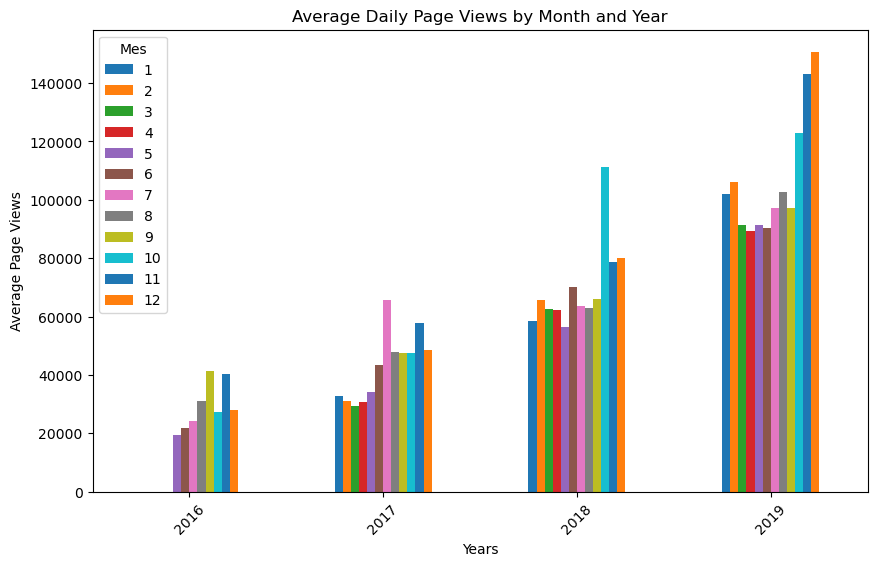

In [109]:
def draw_bar_plot(df):
    df.plot(kind='bar', figsize=(10,6))
    plt.title('Average Daily Page Views by Month and Year')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.xticks(rotation=45)
    plt.show()

draw_bar_plot(avg_views_pivot)

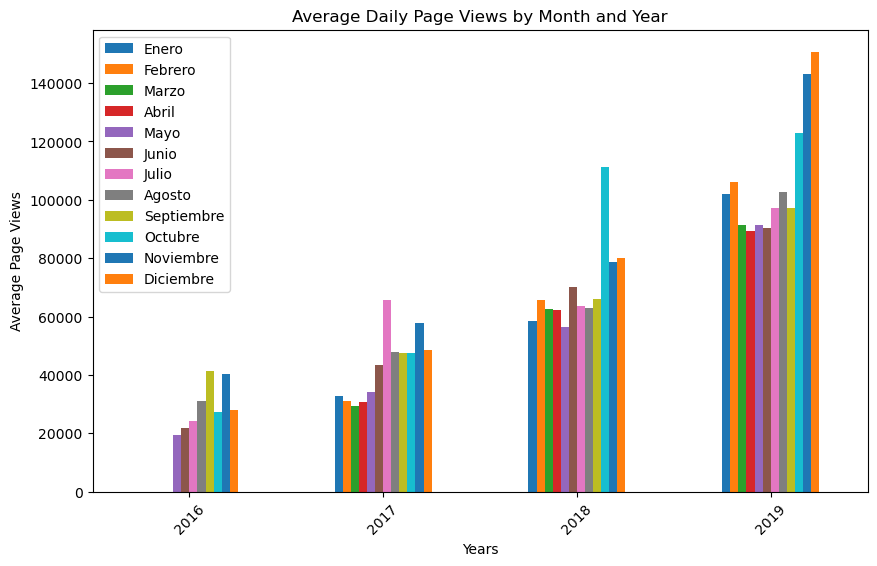

In [111]:
avg_views_pivot2 = avg_views_pivot.copy()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
         'Octubre', 'Noviembre', 'Diciembre']
avg_views_pivot2.columns = meses

draw_bar_plot(avg_views_pivot2)


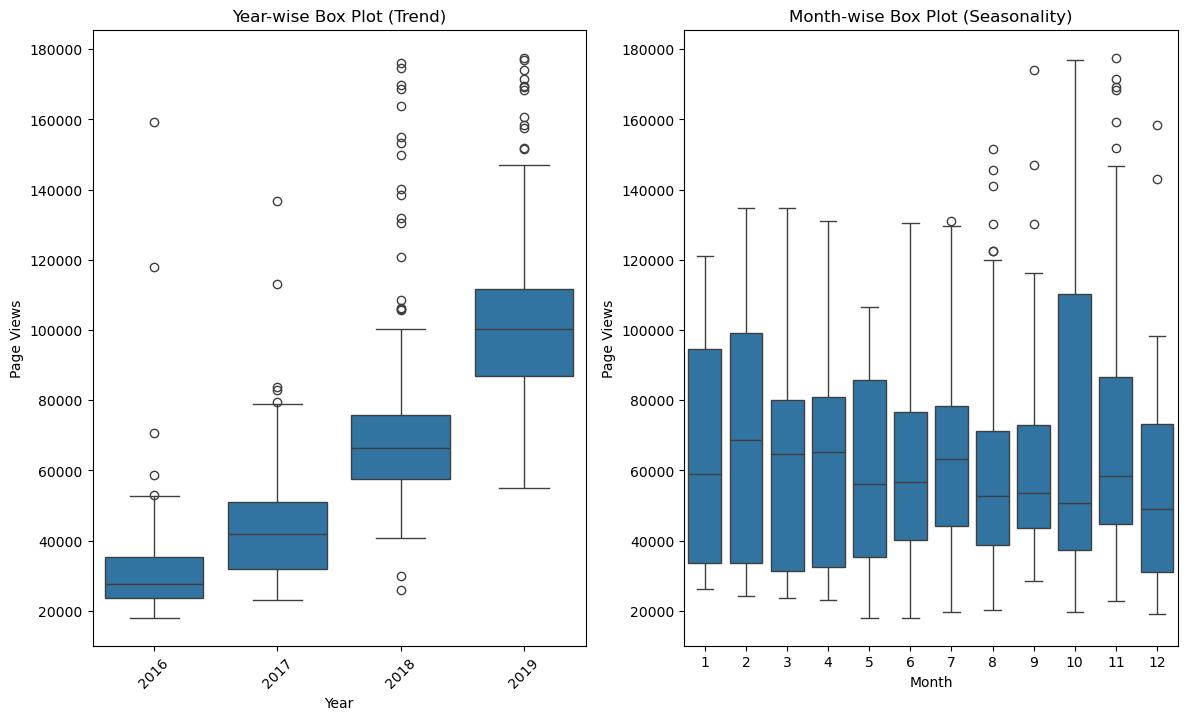

In [121]:
import seaborn as sns

def draw_box_plot(df):
    df_box = df.copy()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize =(14,8))
    sns.boxplot(x='Año', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.tick_params(axis='x', rotation=45)
    sns.boxplot(x='Mes', y='value', data=df_box, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    plt.show()
draw_box_plot(df3)

In [123]:
meses_dict = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df4=df3.copy()
df4['meses']=df4['Mes'].map(meses_dict)
df4

,value,Mes,Año,meses
date,,,,
2016-05-19,19736,5,2016,Mayo
2016-05-26,18060,5,2016,Mayo
2016-05-27,19997,5,2016,Mayo
2016-05-28,19044,5,2016,Mayo
2016-05-29,20325,5,2016,Mayo
...,...,...,...,...
2019-11-24,138875,11,2019,Noviembre
2019-11-29,171584,11,2019,Noviembre
2019-11-30,141161,11,2019,Noviembre


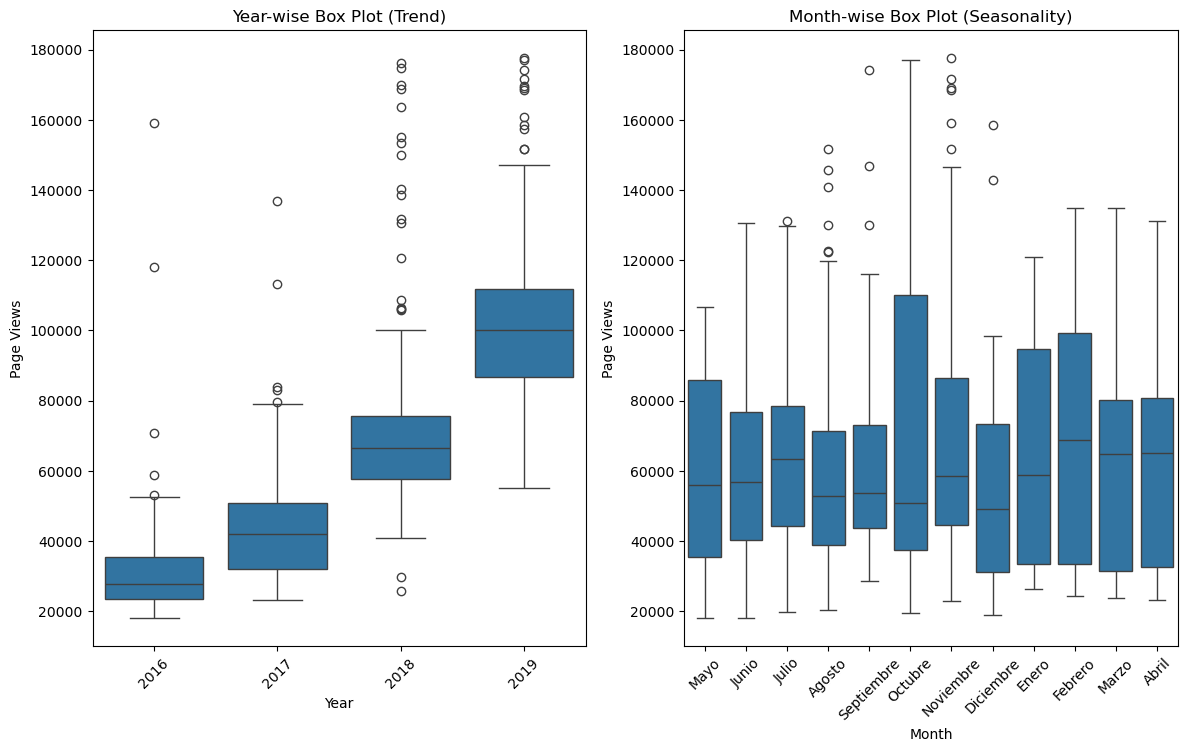

In [135]:
def draw_box_plot2(df):
    df_box = df.copy()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize =(14,8))
    sns.boxplot(x='Año', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.tick_params(axis='x', rotation=45)
    sns.boxplot(x='meses', y='value', data=df_box, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.tick_params(axis='x', rotation=45)
    plt.show()

draw_box_plot2(df4)